<a href="https://colab.research.google.com/github/festeban11/Minor-Machine-Learning/blob/main/Tareas/S07-Linear-Models/Tarea_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Regresion Lineal aplicada a datos de automóviles

En esta tarea usted debe investigar acerca del conjunto de datos [auto mpg](https://seaborn.pydata.org/examples/scatter_bubbles.html) perteneciente a la libreria [seaborn](https://seaborn.pydata.org/)

**Objetivo**: Estimar el rendimiento promedio de automoviles usando regresión lineal

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Carga de datos auto mpg
df = sns.load_dataset("mpg")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [53]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [55]:
df = df.dropna()
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

1) (1 punto) Establecer una visualización de los datos a través de un [Gráfico de dispersión](https://seaborn.pydata.org/tutorial/axis_grids.html)

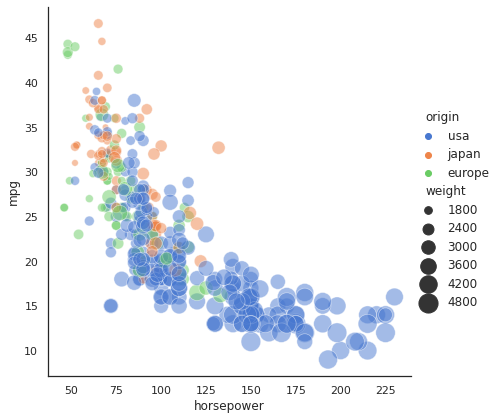

In [56]:
# Visualización de Millas por galón vs caballos de fuerza
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

2) (1 punto) Investigar e incluir un grafico de correlacion ([Correlation Plot](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)) para visualizar la dependencia entre los datos 

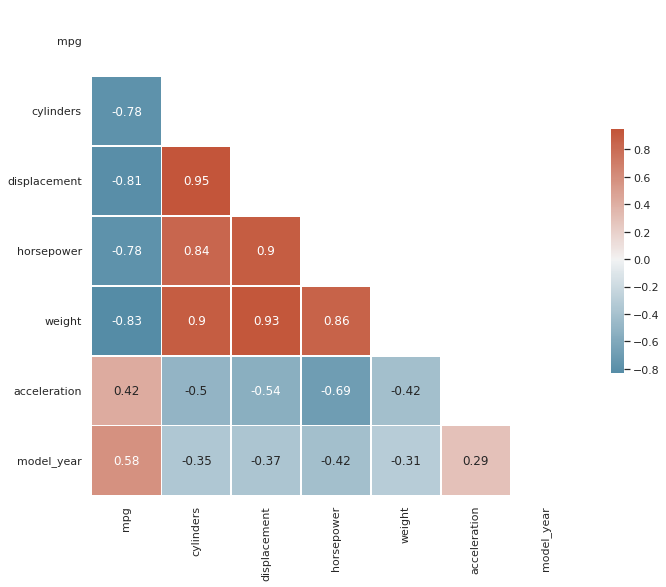

In [57]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

3) (1 punto) Construir y entrenar un modelo de regresion lineal


In [65]:
from sklearn.preprocessing import StandardScaler
df[['displacement','horsepower','weight','acceleration']]=StandardScaler().fit_transform(df[['displacement','horsepower','weight','acceleration']])
Y=df['mpg']
X=df.drop(['mpg','name'],axis=1)
X=pd.get_dummies(X, columns=["origin","cylinders","model_year"])
X.head()

,displacement,horsepower,weight,acceleration,origin_europe,origin_japan,origin_usa,cylinders_3,cylinders_4,cylinders_5,...,model_year_73,model_year_74,model_year_75,model_year_76,model_year_77,model_year_78,model_year_79,model_year_80,model_year_81,model_year_82
0,1.077290,0.664133,0.620540,-1.285258,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.488732,1.574594,0.843334,-1.466724,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.182542,1.184397,0.540382,-1.648189,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.048584,1.184397,0.536845,-1.285258,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.029447,0.924265,0.555706,-1.829655,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
#https://www.kaggle.com/code/viswanathanc/auto-mpg-linear-regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

4) (1 punto) Mostrar estadistiscas de desempeño del modelo (investigar)

In [77]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8598613710199533

In [78]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,y_test)

9.230929470009318

5) (1 punto) Mostrar [graficamente la lineas rectas](https://seaborn.pydata.org/tutorial/regression.html) en un grafico de dispersión para el par de variables que presentan la mayor correlacion. esta informacion la obtiene del correlation plot. realizar un grafico de dispersion con las variables mas correlacionadas.


6) (1 punto) [Guardar el Jupyter notebook resultante en su cuenta propia de Github ](https://bebi103a.github.io/lessons/02/git_with_colab.html) y compartir el enlace en la pagina de la tarea en Educandus.